# Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model

In [59]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the data
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
#Data visualization

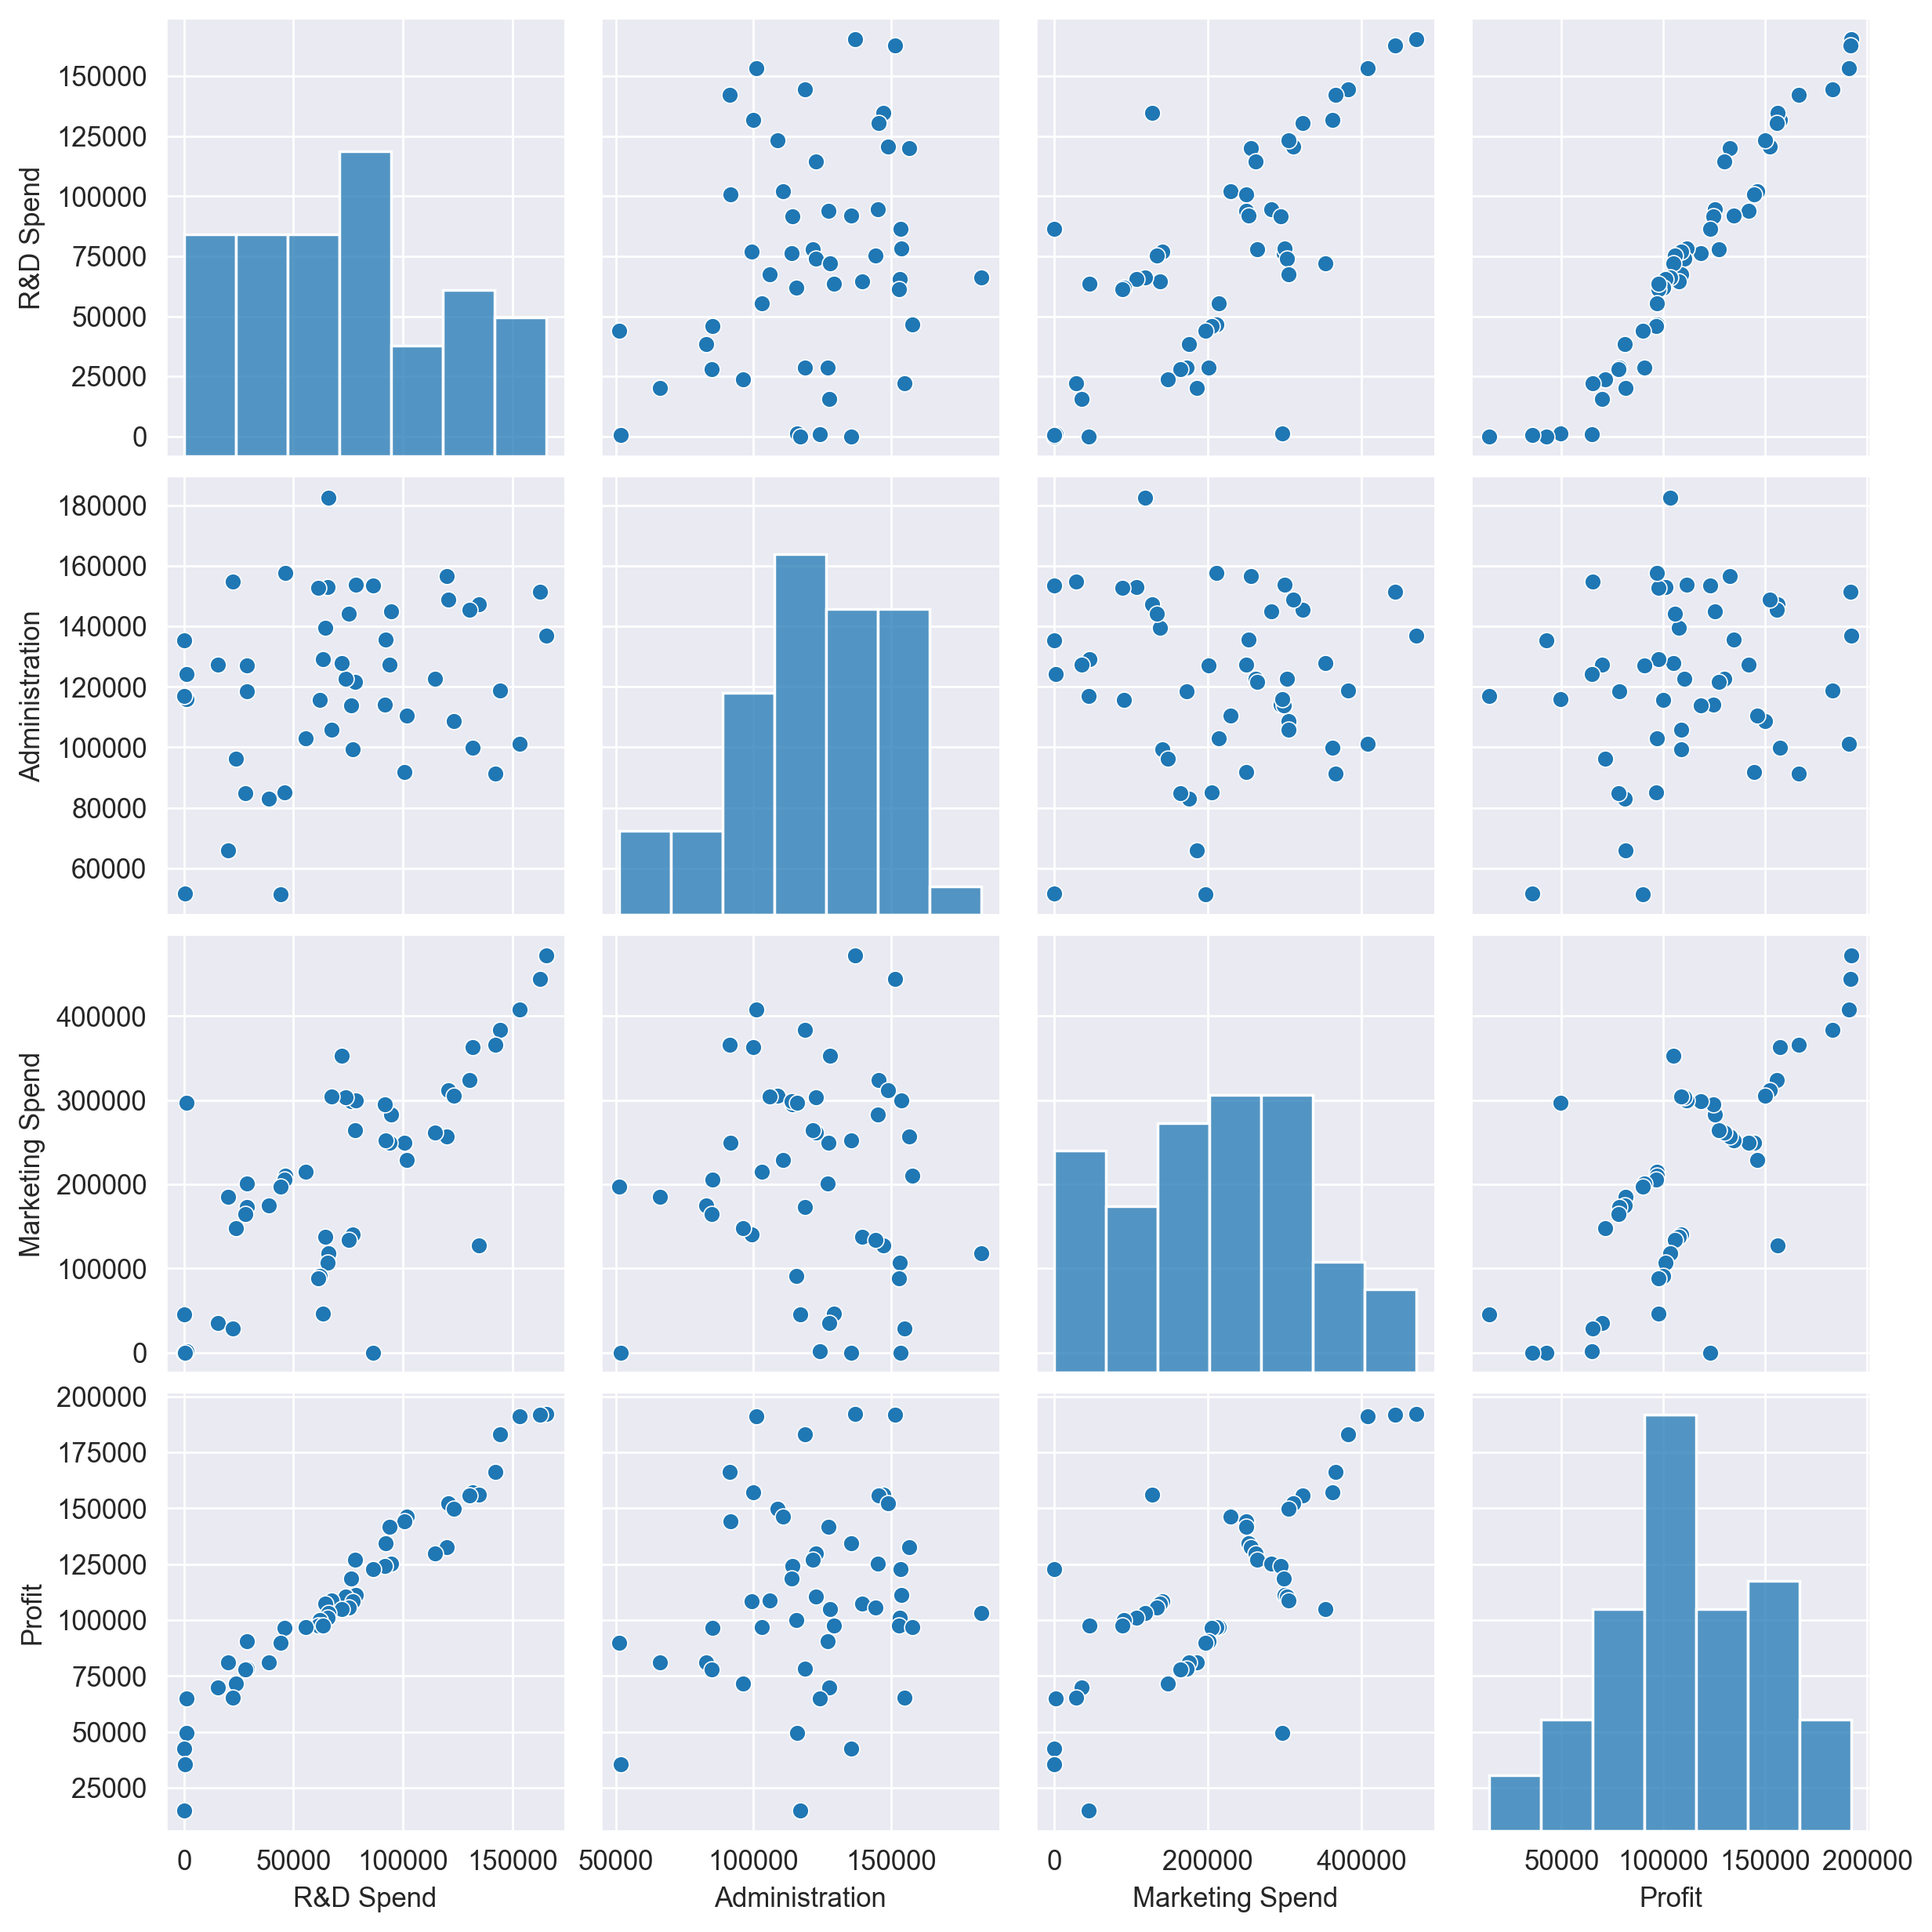

In [7]:
sns.pairplot(df)

<Axes: >

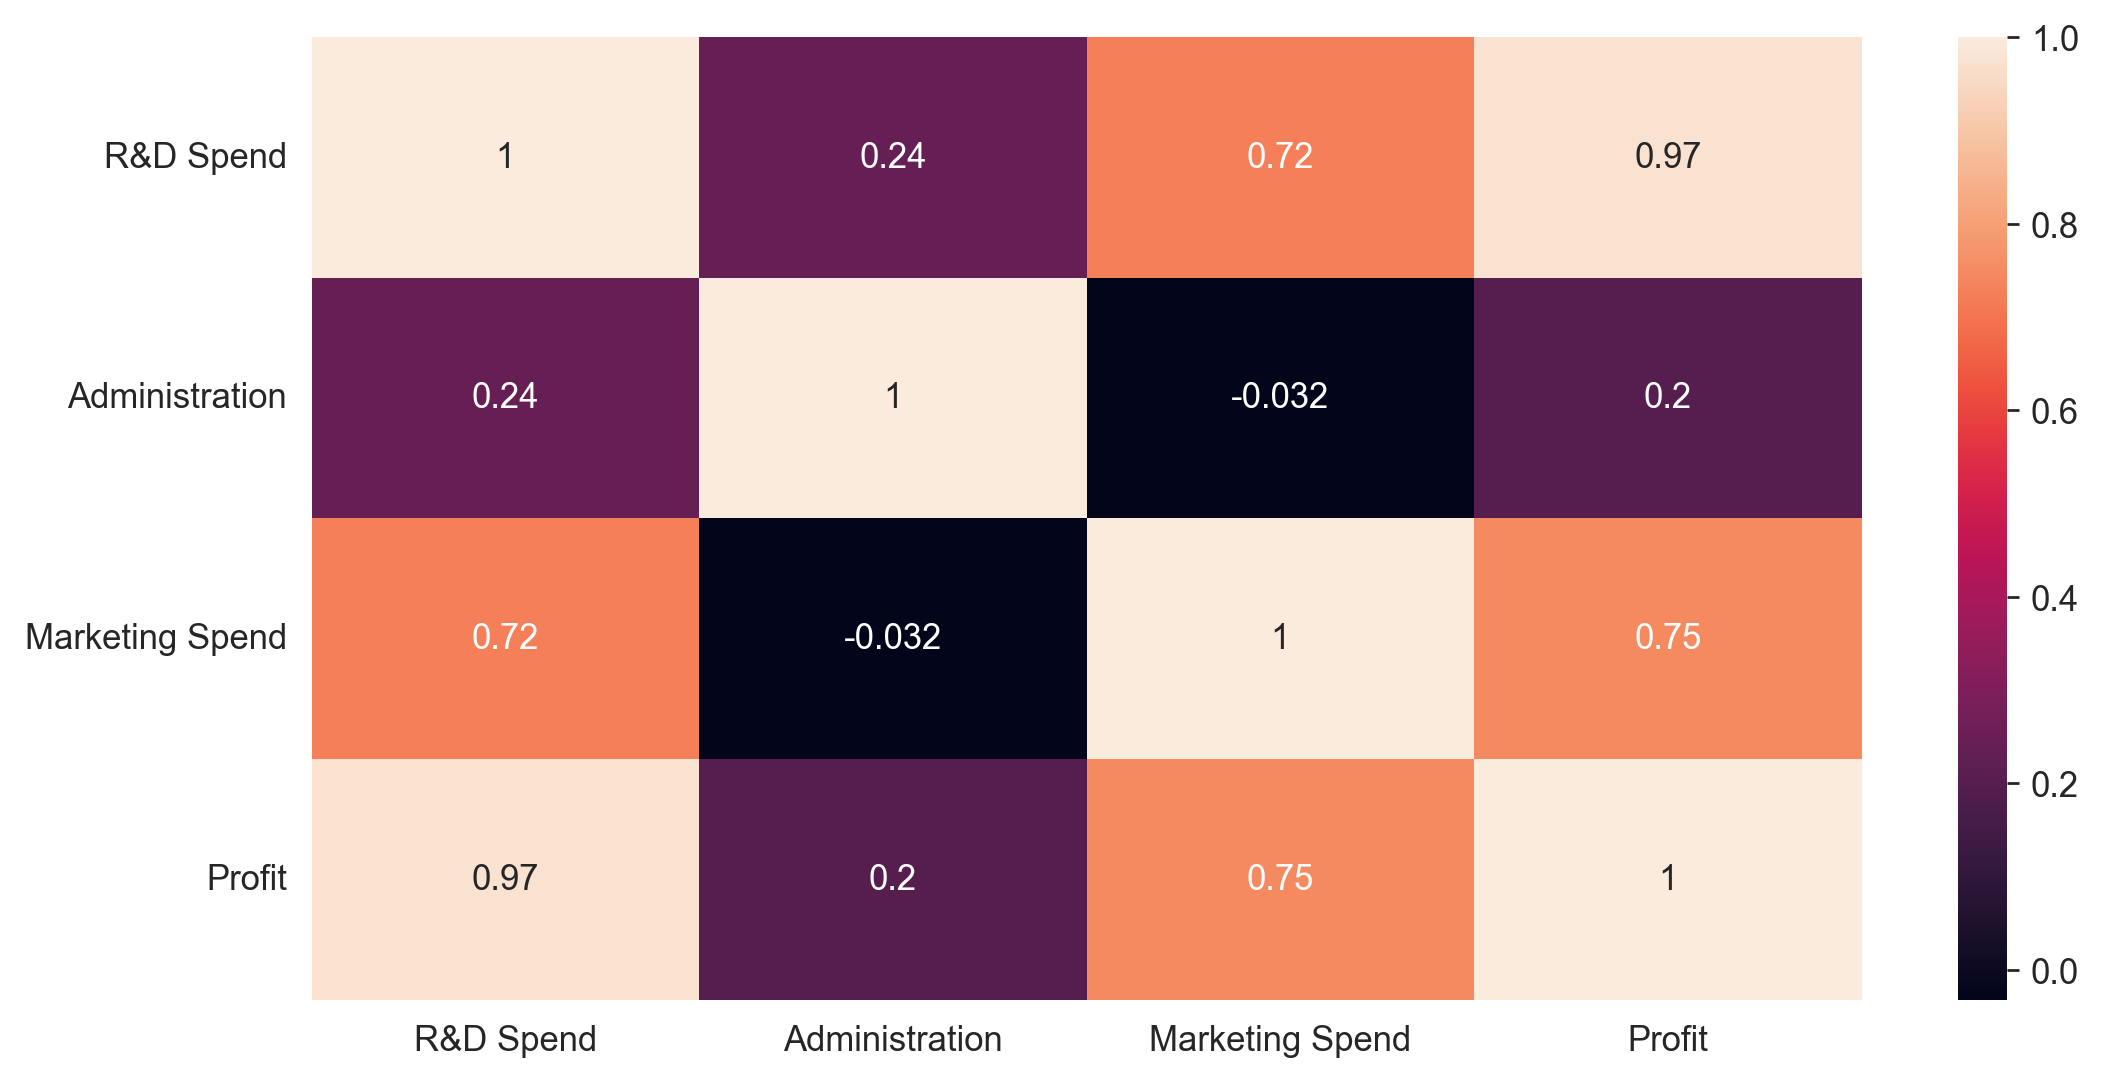

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
df.replace(0,np.nan,inplace=True)

In [12]:
df.isna().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

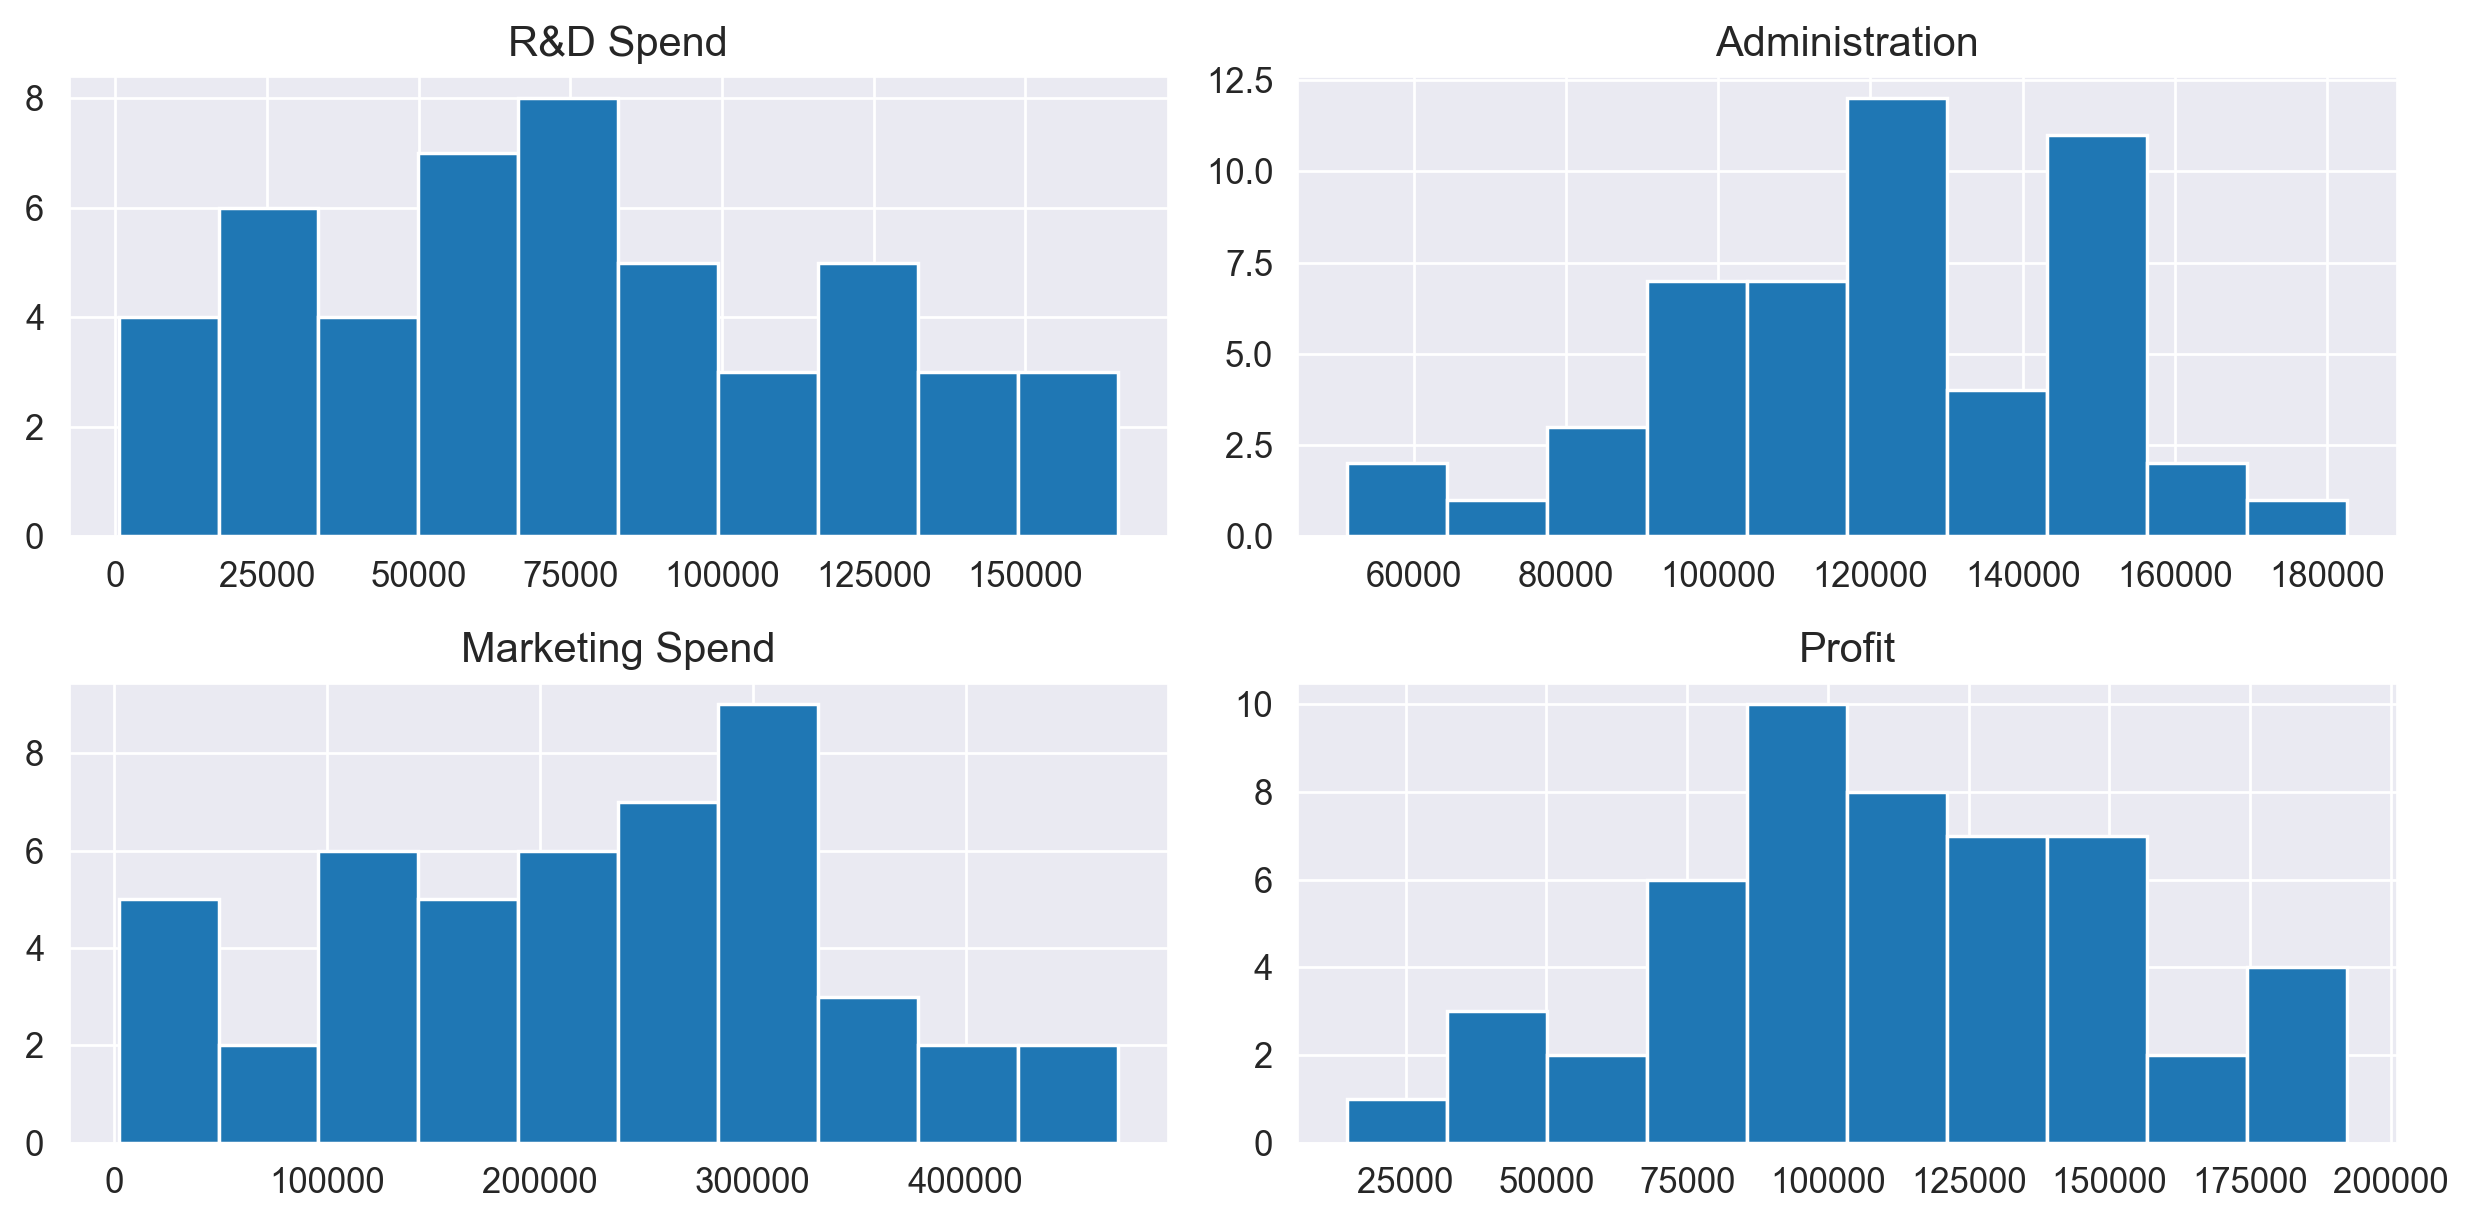

In [13]:
#outlier detection
df.hist()
plt.tight_layout()

<Axes: xlabel='R&D Spend'>

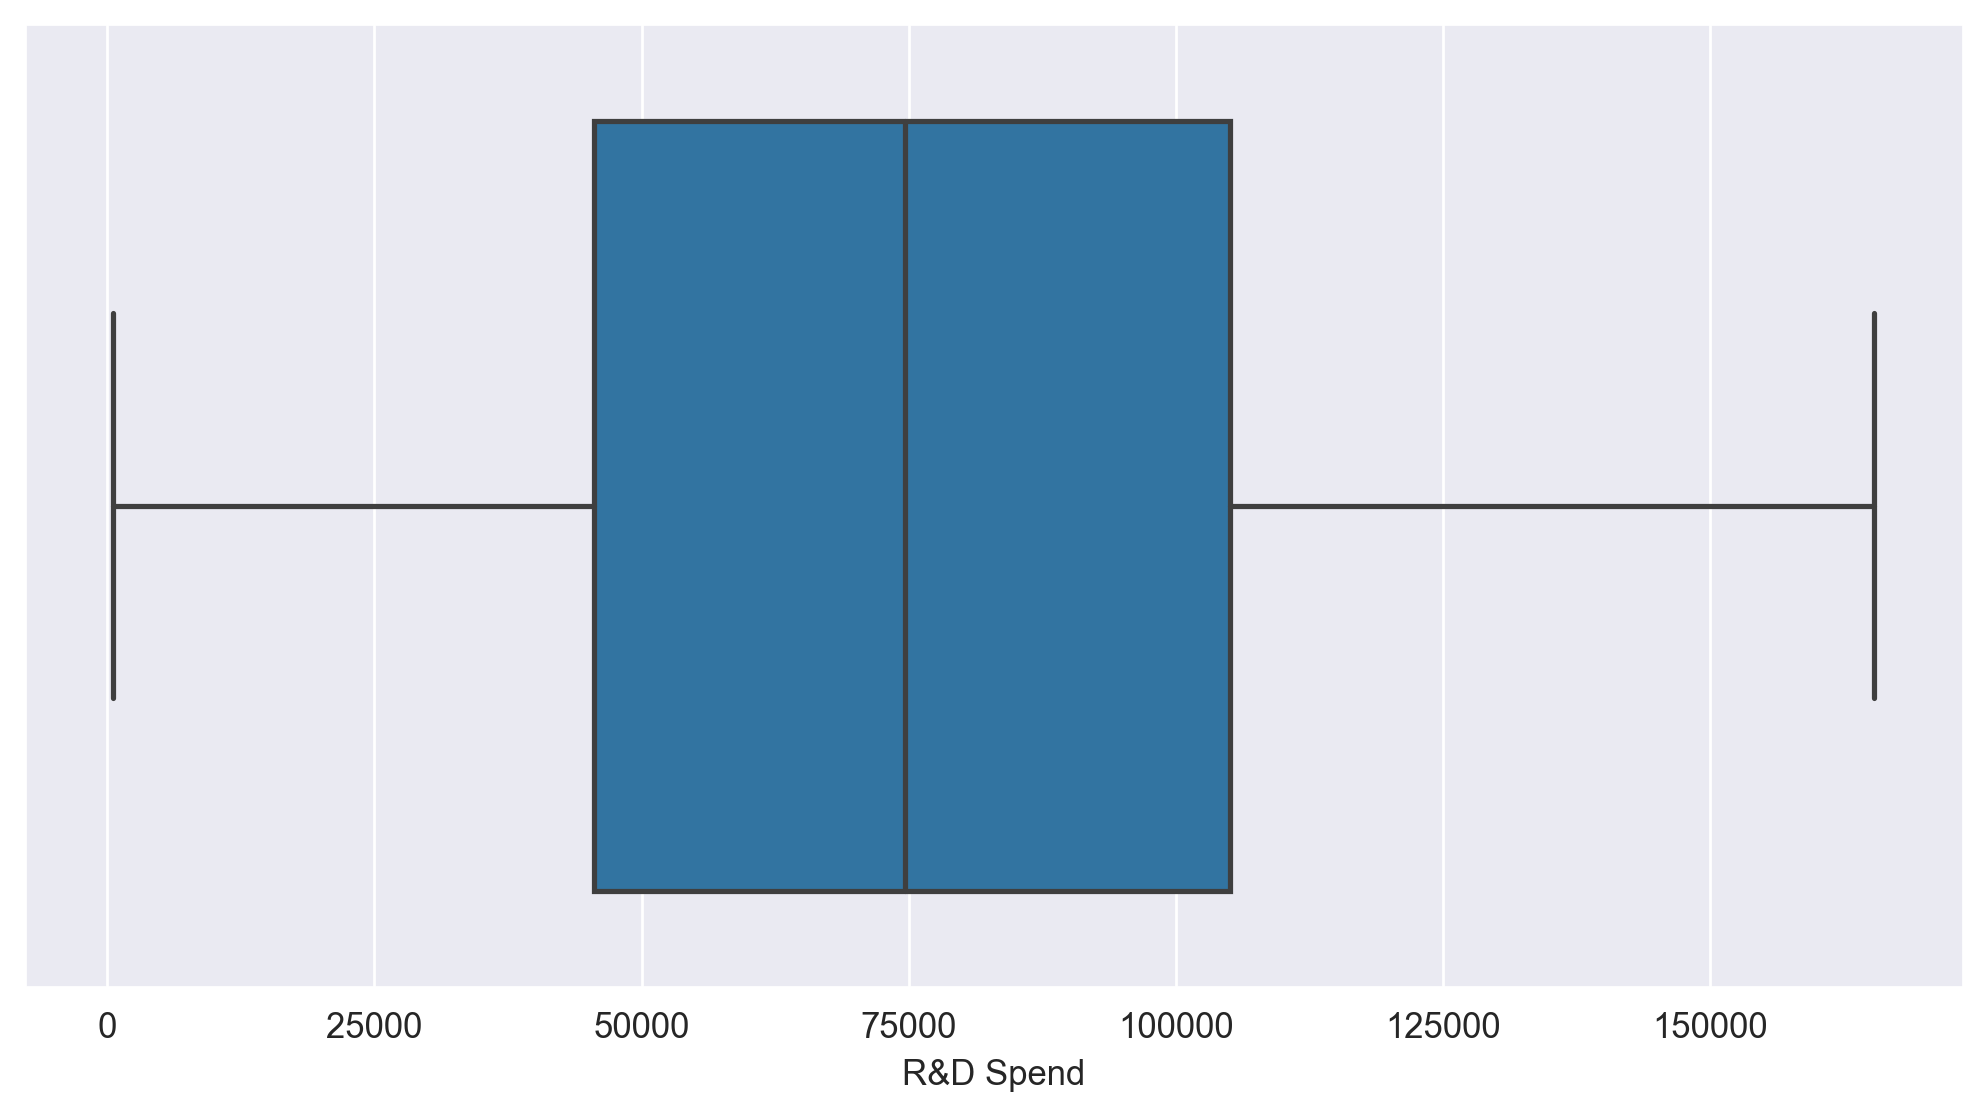

In [14]:
sns.boxplot(x=df['R&D Spend'])

<Axes: xlabel='R&D Spend'>

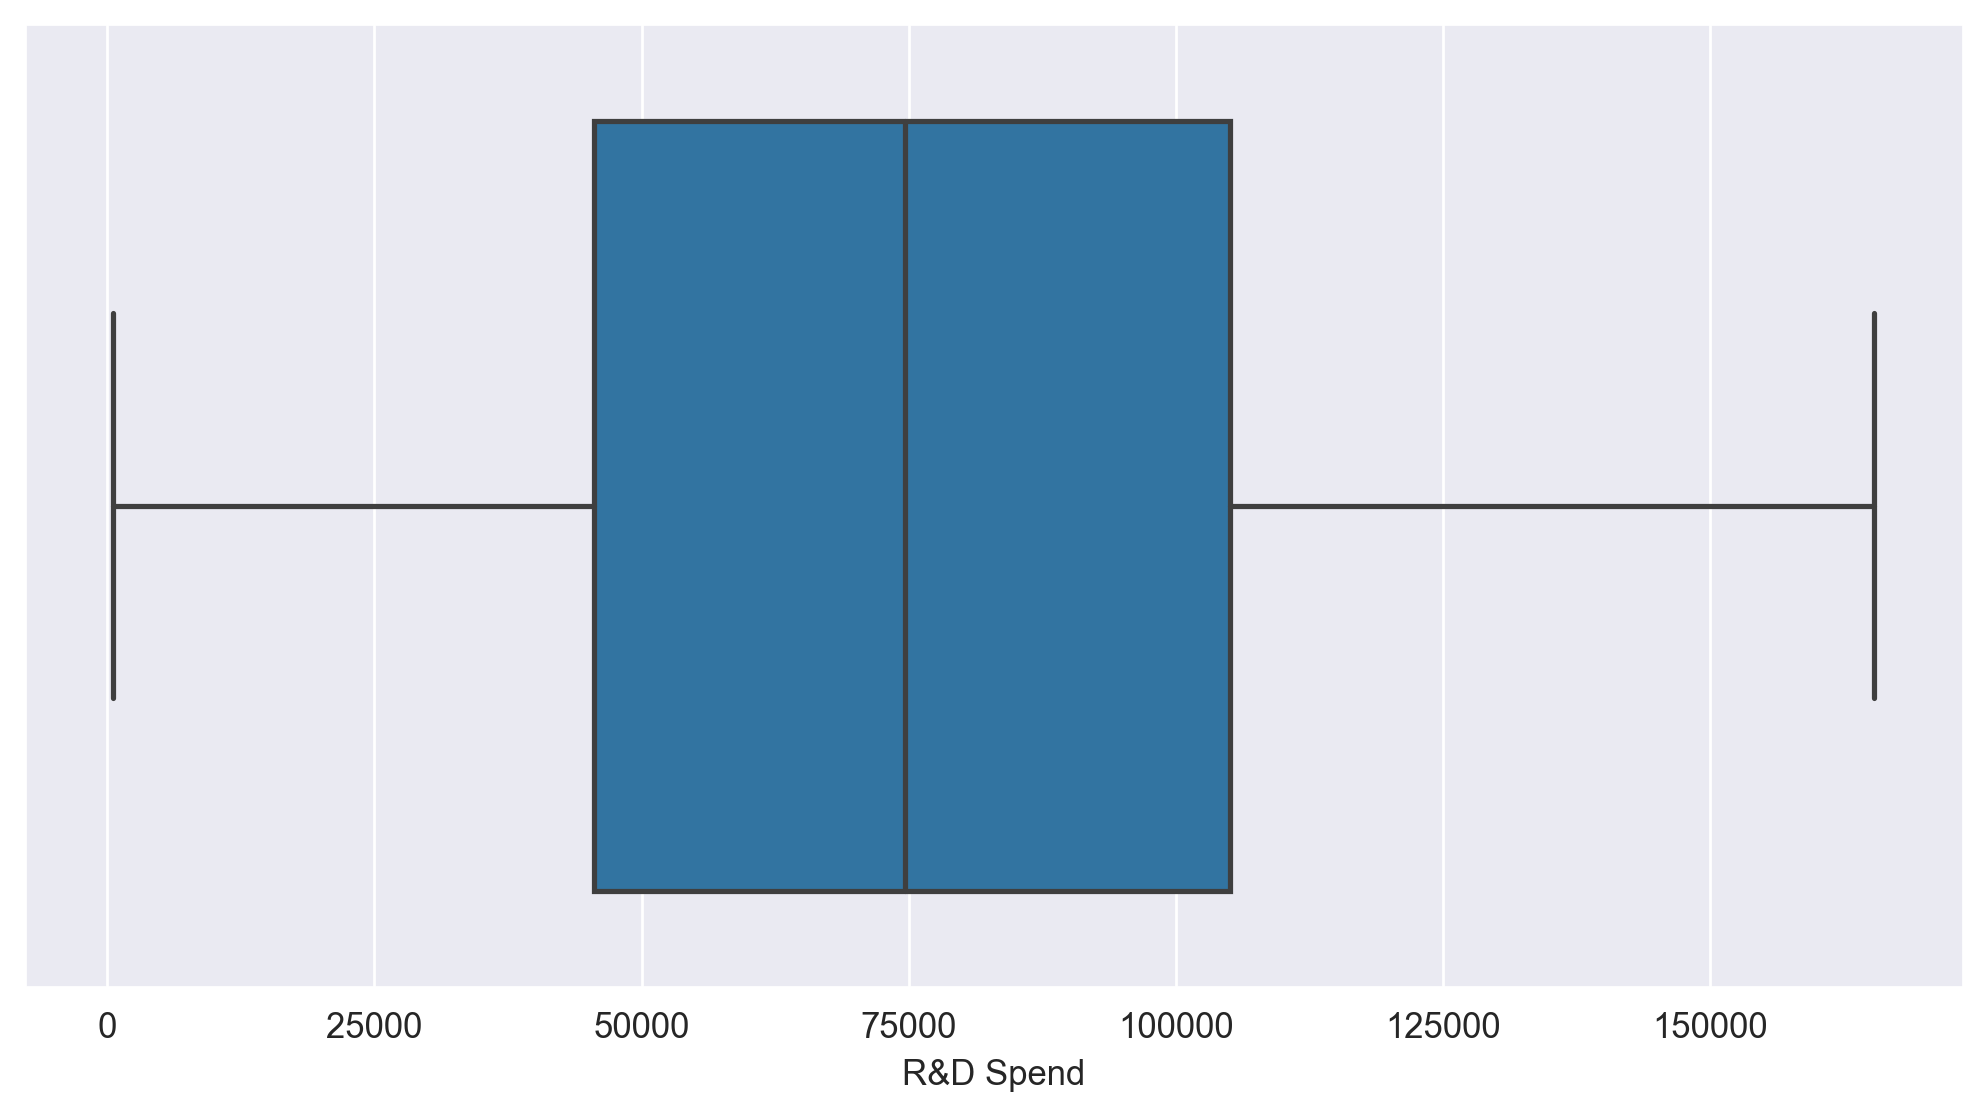

In [15]:
sns.boxplot(x=df['R&D Spend'])

<Axes: xlabel='Marketing Spend'>

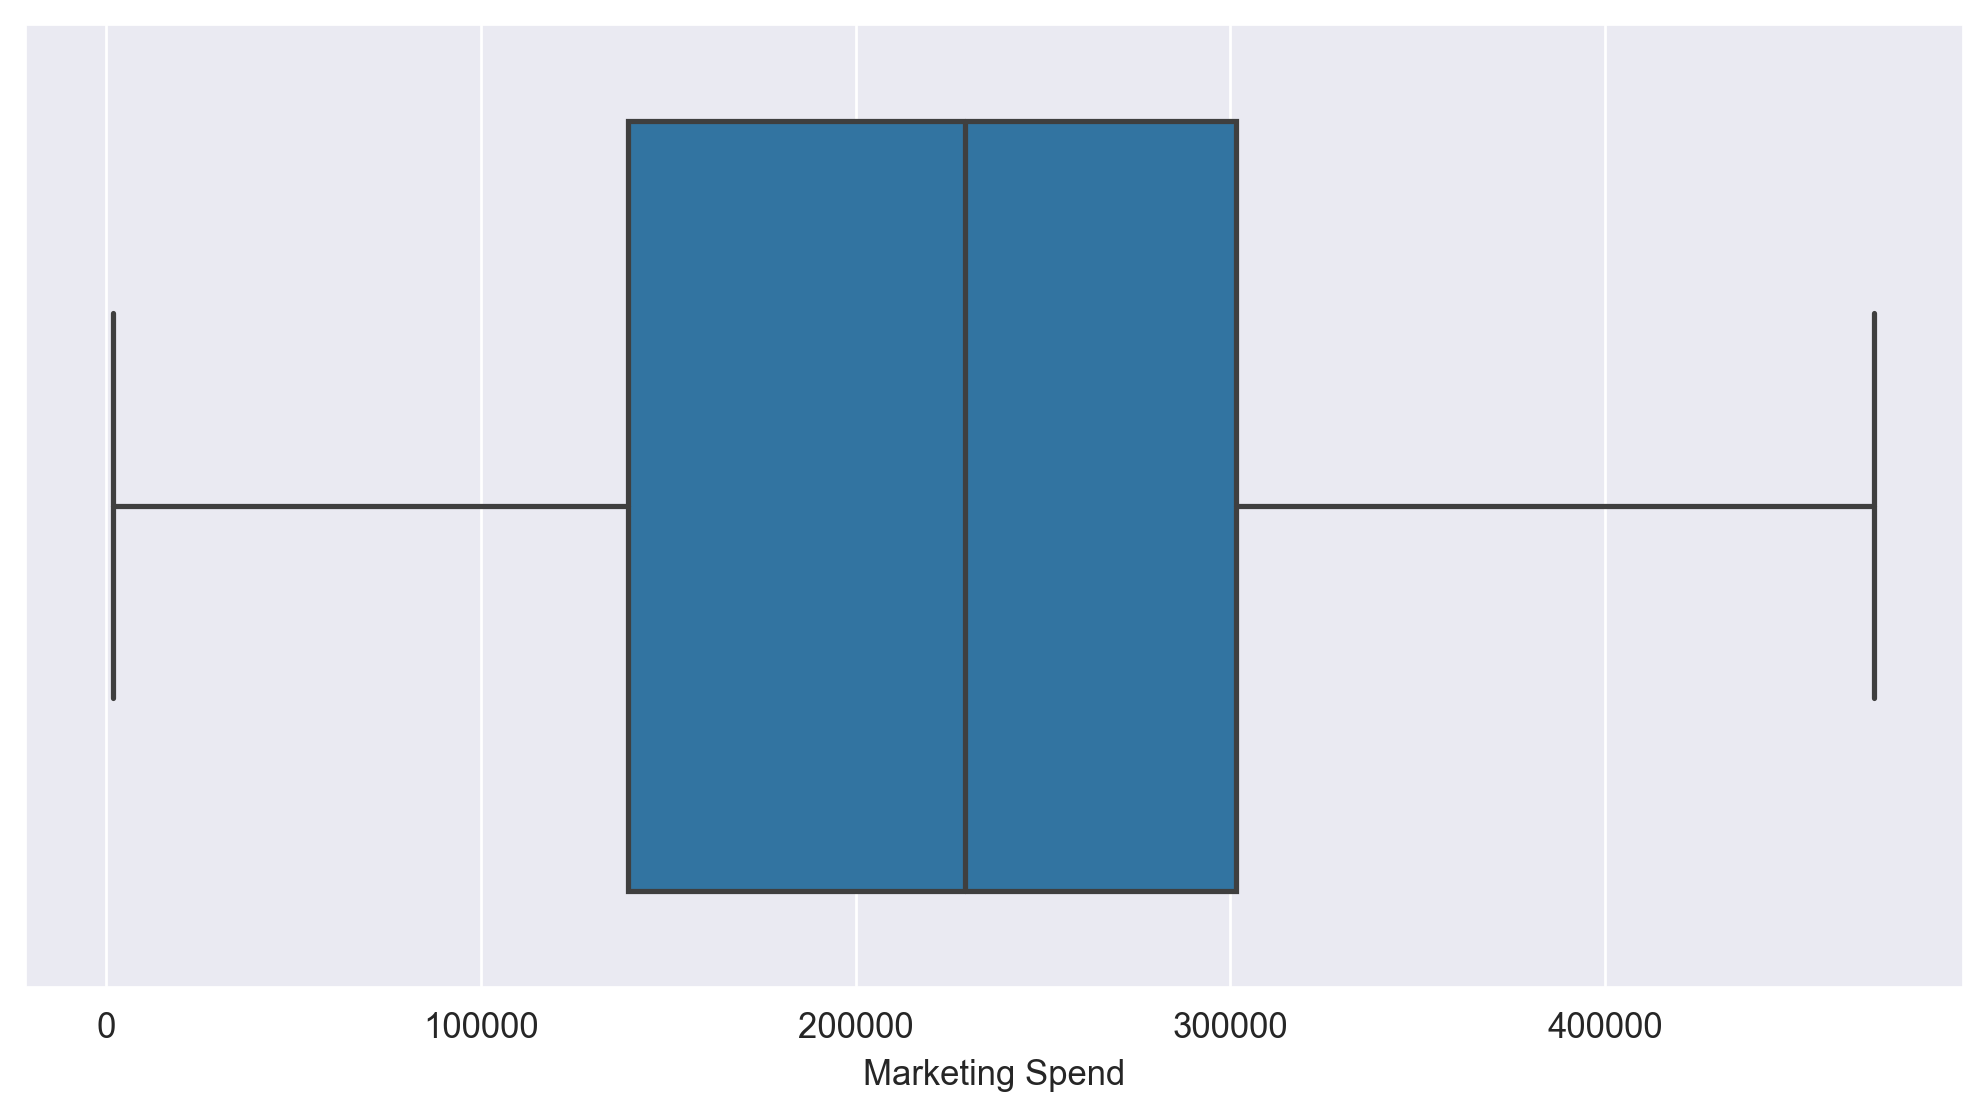

In [16]:
sns.boxplot(x=df['Marketing Spend'])

In [17]:
#there are no outliers

In [18]:
x=df.isna().sum()
x

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

In [19]:
def missing_percent (x):
    y =(x/len(df))*100
    return y

In [20]:
missing_percent (x)

R&D Spend          4.0
Administration     0.0
Marketing Spend    6.0
State              0.0
Profit             0.0
dtype: float64

In [21]:
#Here missing values are less still repalced it with mean

In [22]:
df['R&D Spend'].fillna(df['R&D Spend'].mean(),inplace=True)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.200000,136897.80,471784.10,New York,192261.83
1,162597.700000,151377.59,443898.53,California,191792.06
2,153441.510000,101145.55,407934.54,Florida,191050.39
3,144372.410000,118671.85,383199.62,New York,182901.99
4,142107.340000,91391.77,366168.42,Florida,166187.94
5,131876.900000,99814.71,362861.36,New York,156991.12
6,134615.460000,147198.87,127716.82,California,156122.51
7,130298.130000,145530.06,323876.68,Florida,155752.60
8,120542.520000,148718.95,311613.29,New York,152211.77
9,123334.880000,108679.17,304981.62,California,149759.96


In [23]:
df['Marketing Spend'].fillna(df['Marketing Spend'].mean(),inplace=True)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.200000,136897.80,471784.100000,New York,192261.83
1,162597.700000,151377.59,443898.530000,California,191792.06
2,153441.510000,101145.55,407934.540000,Florida,191050.39
3,144372.410000,118671.85,383199.620000,New York,182901.99
4,142107.340000,91391.77,366168.420000,Florida,166187.94
5,131876.900000,99814.71,362861.360000,New York,156991.12
6,134615.460000,147198.87,127716.820000,California,156122.51
7,130298.130000,145530.06,323876.680000,Florida,155752.60
8,120542.520000,148718.95,311613.290000,New York,152211.77
9,123334.880000,108679.17,304981.620000,California,149759.96


In [24]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.200000,136897.80,471784.100000,New York,192261.83
1,162597.700000,151377.59,443898.530000,California,191792.06
2,153441.510000,101145.55,407934.540000,Florida,191050.39
3,144372.410000,118671.85,383199.620000,New York,182901.99
4,142107.340000,91391.77,366168.420000,Florida,166187.94
5,131876.900000,99814.71,362861.360000,New York,156991.12
6,134615.460000,147198.87,127716.820000,California,156122.51
7,130298.130000,145530.06,323876.680000,Florida,155752.60
8,120542.520000,148718.95,311613.290000,New York,152211.77
9,123334.880000,108679.17,304981.620000,California,149759.96


In [26]:
#converting the categorical data into numerical

In [27]:
cat_cols = df.select_dtypes(object).columns
cat_cols    

Index(['State'], dtype='object')

In [28]:
df[cat_cols]

,State
0,New York
1,California
2,Florida
3,New York
4,Florida
5,New York
6,California
7,Florida
8,New York
9,California


In [29]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])
df[cat_cols]

,State
0,2.0
1,0.0
2,1.0
3,2.0
4,1.0
5,2.0
6,0.0
7,1.0
8,2.0
9,0.0


In [30]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.200000,136897.80,471784.100000,2.0,192261.83
1,162597.700000,151377.59,443898.530000,0.0,191792.06
2,153441.510000,101145.55,407934.540000,1.0,191050.39
3,144372.410000,118671.85,383199.620000,2.0,182901.99
4,142107.340000,91391.77,366168.420000,1.0,166187.94
5,131876.900000,99814.71,362861.360000,2.0,156991.12
6,134615.460000,147198.87,127716.820000,0.0,156122.51
7,130298.130000,145530.06,323876.680000,1.0,155752.60
8,120542.520000,148718.95,311613.290000,2.0,152211.77
9,123334.880000,108679.17,304981.620000,0.0,149759.96


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D_Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     float64
 4   Profit           50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [31]:
df['State'].unique()

array([2., 0., 1.])

In [33]:
df.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,2.0,192261.83


# Model Building

In [55]:
df.rename(columns={'R&D_Spend': 'RD_Spend', 'Marketing Spend': 'Marketing_Spend'}, inplace=True)
df

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.200000,136897.80,471784.100000,2.0,192261.83
1,162597.700000,151377.59,443898.530000,0.0,191792.06
2,153441.510000,101145.55,407934.540000,1.0,191050.39
3,144372.410000,118671.85,383199.620000,2.0,182901.99
4,142107.340000,91391.77,366168.420000,1.0,166187.94
5,131876.900000,99814.71,362861.360000,2.0,156991.12
6,134615.460000,147198.87,127716.820000,0.0,156122.51
7,130298.130000,145530.06,323876.680000,1.0,155752.60
8,120542.520000,148718.95,311613.290000,2.0,152211.77
9,123334.880000,108679.17,304981.620000,0.0,149759.96


In [48]:
column_names = df.columns
column_names

Index(['R&D_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [56]:
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State',data=df).fit()
model

In [69]:
With_all_Feature=model.rsquared
With_all_Feature

0.8003524998067147

In [58]:
model.pvalues

Intercept          9.440455e-03
RD_Spend           1.255153e-09
Administration     8.995460e-01
Marketing_Spend    6.716463e-02
State              3.904805e-01
dtype: float64

In [60]:
data = df.drop(columns=['Profit'])
data

,RD_Spend,Administration,Marketing_Spend,State
0,165349.200000,136897.80,471784.100000,2.0
1,162597.700000,151377.59,443898.530000,0.0
2,153441.510000,101145.55,407934.540000,1.0
3,144372.410000,118671.85,383199.620000,2.0
4,142107.340000,91391.77,366168.420000,1.0
5,131876.900000,99814.71,362861.360000,2.0
6,134615.460000,147198.87,127716.820000,0.0
7,130298.130000,145530.06,323876.680000,1.0
8,120542.520000,148718.95,311613.290000,2.0
9,123334.880000,108679.17,304981.620000,0.0


In [61]:
vif = pd.DataFrame()
vif

""


In [62]:
vif['Features'] = data.columns
vif

,Features
0,RD_Spend
1,Administration
2,Marketing_Spend
3,State


In [63]:
data.values

array([[1.65349200e+05, 1.36897800e+05, 4.71784100e+05, 2.00000000e+00],
       [1.62597700e+05, 1.51377590e+05, 4.43898530e+05, 0.00000000e+00],
       [1.53441510e+05, 1.01145550e+05, 4.07934540e+05, 1.00000000e+00],
       [1.44372410e+05, 1.18671850e+05, 3.83199620e+05, 2.00000000e+00],
       [1.42107340e+05, 9.13917700e+04, 3.66168420e+05, 1.00000000e+00],
       [1.31876900e+05, 9.98147100e+04, 3.62861360e+05, 2.00000000e+00],
       [1.34615460e+05, 1.47198870e+05, 1.27716820e+05, 0.00000000e+00],
       [1.30298130e+05, 1.45530060e+05, 3.23876680e+05, 1.00000000e+00],
       [1.20542520e+05, 1.48718950e+05, 3.11613290e+05, 2.00000000e+00],
       [1.23334880e+05, 1.08679170e+05, 3.04981620e+05, 0.00000000e+00],
       [1.01913080e+05, 1.10594110e+05, 2.29160950e+05, 1.00000000e+00],
       [1.00671960e+05, 9.17906100e+04, 2.49744550e+05, 0.00000000e+00],
       [9.38637500e+04, 1.27320380e+05, 2.49839440e+05, 1.00000000e+00],
       [9.19923900e+04, 1.35495070e+05, 2.52664930e

In [64]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif

,Features,VIF
0,RD_Spend,8.685052
1,Administration,5.702548
2,Marketing_Spend,8.514341
3,State,2.508825


# Subset Selection AIC

In [65]:
#RD_Spend
RD_Spend = smf.ols('Profit~RD_Spend+Administration+State',data = df).fit()
RD_Spend.rsquared, RD_Spend.aic

(0.7847400456707212, 1132.5142828321173)

In [67]:
#Marketing_Spend
Marketing_Spend = smf.ols('Profit~Administration+Marketing_Spend+State',data = df).fit()
Marketing_Spend.rsquared, Marketing_Spend.aic

(0.5430075822882268, 1170.1553034143922)

In [ ]:
#here thus r2 value is high if we choose RD_spend and drop marketing spend

In [ ]:
R2 values = {'With_all_Feature':'0.80','Profit~RD_Spend+Administration+State':'0.78',
             'Profit~Administration+Marketing_Spend+State':'0.54